Epoch 1/200, Loss: 0.6925685122083468
Epoch 2/200, Loss: 0.6923369902634368
Epoch 3/200, Loss: 0.6921308613649768
Epoch 4/200, Loss: 0.6919473384110009
Epoch 5/200, Loss: 0.6917839401971689
Epoch 6/200, Loss: 0.6916384579136643
Epoch 7/200, Loss: 0.691508925285864
Epoch 8/200, Loss: 0.6913935919695863
Epoch 9/200, Loss: 0.6912908998515112
Epoch 10/200, Loss: 0.6911994619415309
Epoch 11/200, Loss: 0.6911180435765144
Epoch 12/200, Loss: 0.6910455456845548
Epoch 13/200, Loss: 0.690980989885407
Epoch 14/200, Loss: 0.690923505226793
Epoch 15/200, Loss: 0.6908723163777727
Epoch 16/200, Loss: 0.6908267331196658
Epoch 17/200, Loss: 0.6907861409922976
Epoch 18/200, Loss: 0.690749992968787
Epoch 19/200, Loss: 0.6907178020459182
Epoch 20/200, Loss: 0.6906891346494667
Epoch 21/200, Loss: 0.6906636047648697
Epoch 22/200, Loss: 0.690640868713442
Epoch 23/200, Loss: 0.690620620503105
Epoch 24/200, Loss: 0.6906025876903938
Epoch 25/200, Loss: 0.6905865276974618
Epoch 26/200, Loss: 0.6905722245339957
E

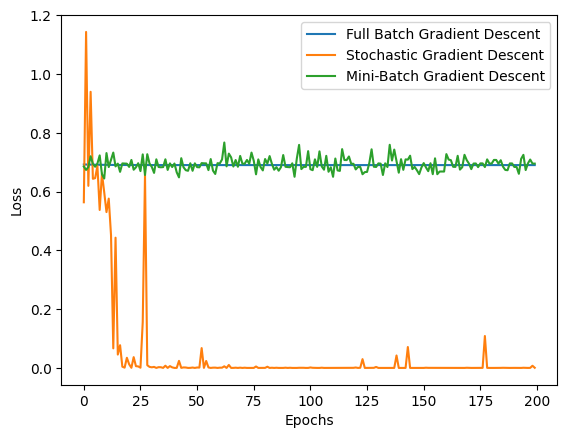

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.randn(300, 2)
y = (np.sum(X, axis=1) > 0).astype(int)
y = y.reshape(-1, 1)

# Define the 3-layer neural network
class NeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.W1 = np.random.randn(input_dim, hidden_dim) * 0.01
        self.b1 = np.zeros((1, hidden_dim))
        self.W2 = np.random.randn(hidden_dim, hidden_dim) * 0.01
        self.b2 = np.zeros((1, hidden_dim))
        self.W3 = np.random.randn(hidden_dim, output_dim) * 0.01
        self.b3 = np.zeros((1, output_dim))
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_derivative(self, z):
        return z * (1 - z)
    
    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.sigmoid(self.Z2)
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = self.sigmoid(self.Z3)
        return self.A3
    
    def backward(self, X, y, output):
        m = X.shape[0]
        dZ3 = output - y
        dW3 = np.dot(self.A2.T, dZ3) / m
        db3 = np.sum(dZ3, axis=0, keepdims=True) / m
        
        dA2 = np.dot(dZ3, self.W3.T)
        dZ2 = dA2 * self.sigmoid_derivative(self.A2)
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.sigmoid_derivative(self.A1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        
        self.W3 -= learning_rate * dW3
        self.b3 -= learning_rate * db3
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        
    def compute_loss(self, y, output):
        m = y.shape[0]
        loss = -1 / m * np.sum(y * np.log(output) + (1 - y) * np.log(1 - output))
        return loss
    
# Training function
def train(X, y, nn, epochs, learning_rate, batch_size=None):
    losses = []
    for epoch in range(epochs):
        if batch_size:
            indices = np.random.permutation(X.shape[0])
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]
                output = nn.forward(X_batch)
                nn.backward(X_batch, y_batch, output)
                loss = nn.compute_loss(y_batch, output)
        else:
            output = nn.forward(X)
            nn.backward(X, y, output)
            loss = nn.compute_loss(y, output)
        losses.append(loss)
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss}')
    return losses

# Hyperparameters
input_dim = 2
hidden_dim = 5
output_dim = 1
epochs = 200
learning_rate = 0.1

# Full Batch Gradient Descent
nn_full_batch = NeuralNetwork(input_dim, hidden_dim, output_dim)
losses_full_batch = train(X, y, nn_full_batch, epochs, learning_rate)

# Stochastic Gradient Descent
nn_sgd = NeuralNetwork(input_dim, hidden_dim, output_dim)
batch_size = 1
losses_sgd = train(X, y, nn_sgd, epochs, learning_rate, batch_size=batch_size)

# Mini-Batch Gradient Descent
nn_mini_batch = NeuralNetwork(input_dim, hidden_dim, output_dim)
batch_size = 32
losses_mini_batch = train(X, y, nn_mini_batch, epochs, learning_rate, batch_size=batch_size)

# Plotting the results
plt.plot(losses_full_batch, label='Full Batch Gradient Descent')
plt.plot(losses_sgd, label='Stochastic Gradient Descent')
plt.plot(losses_mini_batch, label='Mini-Batch Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
